# Multi-Layer-Perceptron

In [1]:
import numpy as np
import torch
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

### 1. 논리 게이트

#### 1-1. 논리 게이트 예측 모델

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2  * delta_x)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [3]:
class LogicGate:
    
    def __init__(self, gate_name, xdata, tdata):
        
        self.name = gate_name
        
        self.__xdata = xdata.reshape(4,2)
        self.__tdata = tdata.reshape(4,1)
        
        self.__W = np.random.rand(2, 1)
        self.__b = np.random.rand(1)
        
        self.__learning_rate = 1e-2
        
    def __loss_func(self):
        
        delta = 1e-7
        
        z = np.dot(self.__xdata, self.__W) + self.__b
        y = sigmoid(z)
        
        return -np.sum( self.__tdata * np.log(y + delta) + (1-self.__tdata) * np.log((1-y) + delta))
    
    def error_val(self):
        
        delta = 1e-7
        
        z = np.dot(self.__xdata, self.__W) + self.__b
        y = sigmoid(z)
        
        return - np.sum( self.__tdata * np.log(y + delta) + (1 - self.__tdata) * np.log((1-y) + delta))
    
    def train(self):
        
        f = lambda x : self.__loss_func()
        
        print("Initial error value = ", self.error_val())
        
        for step in range(8001):
            
            self.__W -= self.__learning_rate * numerical_derivative(f, self.__W)
            
            self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
            
            if (step % 400 == 0):
                print("step = ", step, "error value = ", self.error_val())
                
    def predict(self, input_data):
        
        z = np.dot(input_data, self.__W) + self.__b
        y = sigmoid(z)
        
        if y > 0.5:
            result = 1 #True
        else:
            result = 0 #False
            
        return y, result

#### 1-2. AND GATE

In [4]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 0, 0, 1])

AND_obj = LogicGate("AND_GATE", xdata, tdata)

AND_obj.train()

Initial error value =  4.635841303140489
step =  0 error value =  4.57896675139003
step =  400 error value =  1.5769303987147492
step =  800 error value =  1.1623360316089433
step =  1200 error value =  0.9308593228660458
step =  1600 error value =  0.7793040215253395
step =  2000 error value =  0.6708804702350186
step =  2400 error value =  0.5889226319877797
step =  2800 error value =  0.5245952727131109
step =  3200 error value =  0.47269349063641963
step =  3600 error value =  0.42991553822166284
step =  4000 error value =  0.3940501072606819
step =  4400 error value =  0.36355354337548396
step =  4800 error value =  0.33731241695478287
step =  5200 error value =  0.31450197790425904
step =  5600 error value =  0.2944976494574296
step =  6000 error value =  0.27681749246952025
step =  6400 error value =  0.2610835754619254
step =  6800 error value =  0.24699532117515643
step =  7200 error value =  0.23431068168302654
step =  7600 error value =  0.22283257015187385
step =  8000 erro

In [5]:
print(AND_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = AND_obj.predict(input_data)
    print(input_data, " = ", logical_val, "\n")

AND_GATE 

[0 0]  =  0 

[0 1]  =  0 

[1 0]  =  0 

[1 1]  =  1 



#### 1-2. OR GATE

In [6]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 1, 1, 1])

OR_obj = LogicGate("OR_GATE", xdata, tdata)

OR_obj.train()

Initial error value =  1.9106419411012103
step =  0 error value =  1.9078257819924649
step =  400 error value =  1.194123007831091
step =  800 error value =  0.8492565016631924
step =  1200 error value =  0.6522627872140118
step =  1600 error value =  0.526129458146585
step =  2000 error value =  0.43899837288717813
step =  2400 error value =  0.37551096611801565
step =  2800 error value =  0.3273744623564773
step =  3200 error value =  0.28973049130242345
step =  3600 error value =  0.2595526308789194
step =  4000 error value =  0.23486271760500352
step =  4400 error value =  0.2143164026599313
step =  4800 error value =  0.19697007608336564
step =  5200 error value =  0.18214308450959735
step =  5600 error value =  0.1693328317875151
step =  6000 error value =  0.15816059266822344
step =  6400 error value =  0.14833586573369356
step =  6800 error value =  0.13963229553955145
step =  7200 error value =  0.13187102698574962
step =  7600 error value =  0.12490895798735849
step =  8000 e

In [7]:
print(OR_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = OR_obj.predict(input_data)
    print(input_data, " = ", logical_val, "\n")

OR_GATE 

[0 0]  =  0 

[0 1]  =  1 

[1 0]  =  1 

[1 1]  =  1 



#### 1-3. NAND GATE

In [8]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([1, 1, 1, 0])

NAND_obj = LogicGate("NAND_GATE", xdata, tdata)

NAND_obj.train()

Initial error value =  2.9853883136340755
step =  0 error value =  2.9768401004721308
step =  400 error value =  1.6535637704887765
step =  800 error value =  1.199760085072825
step =  1200 error value =  0.9536851743470895
step =  1600 error value =  0.794981066812043
step =  2000 error value =  0.6824246403631082
step =  2400 error value =  0.5978186346952975
step =  2800 error value =  0.5316749473169919
step =  3200 error value =  0.4784660561847996
step =  3600 error value =  0.43471313477599166
step =  4000 error value =  0.3980998990816681
step =  4400 error value =  0.36701672638633226
step =  4800 error value =  0.34030680175164724
step =  5200 error value =  0.3171157818773449
step =  5600 error value =  0.2967982909573309
step =  6000 error value =  0.2788574004752524
step =  6400 error value =  0.2629041432389376
step =  6800 error value =  0.24862966568310635
step =  7200 error value =  0.23578561190012173
step =  7600 error value =  0.2241700180835976
step =  8000 error v

In [9]:
print(NAND_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = NAND_obj.predict(input_data)
    print(input_data, " = ", logical_val, "\n")

NAND_GATE 

[0 0]  =  1 

[0 1]  =  1 

[1 0]  =  1 

[1 1]  =  0 



#### 1-4. XOR GATE

In [10]:
xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 1, 1, 0])

XOR_obj = LogicGate("XOR_GATE", xdata, tdata)

XOR_obj.train()

Initial error value =  3.3541575230489147
step =  0 error value =  3.341034099716905
step =  400 error value =  2.7932625946207748
step =  800 error value =  2.7784885702151296
step =  1200 error value =  2.7742634835581876
step =  1600 error value =  2.7730630396143123
step =  2000 error value =  2.772722595041256
step =  2400 error value =  2.7726260920580947
step =  2800 error value =  2.7725987403815178
step =  3200 error value =  2.7725909883283215
step =  3600 error value =  2.7725887912349165
step =  4000 error value =  2.7725881685319527
step =  4400 error value =  2.7725879920444463
step =  4800 error value =  2.7725879420240216
step =  5200 error value =  2.77258792784713
step =  5600 error value =  2.7725879238290854
step =  6000 error value =  2.772587922690282
step =  6400 error value =  2.7725879223675207
step =  6800 error value =  2.7725879222760432
step =  7200 error value =  2.7725879222501164
step =  7600 error value =  2.772587922242768
step =  8000 error value =  2

In [11]:
print(XOR_obj.name, "\n")

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for input_data in test_data:
    (sigmoid_val, logical_val) = XOR_obj.predict(input_data)
    print(input_data, " = ", logical_val, "\n")

XOR_GATE 

[0 0]  =  0 

[0 1]  =  0 

[1 0]  =  0 

[1 1]  =  1 



In [12]:
input_data = np.array([ [0,0], [0,1], [1,0], [1, 1] ])

s1 = []
s2 = []

new_input_data = []
final_output = []

for index in range(len(input_data)):
    
    s1 = NAND_obj.predict(input_data[index])
    s2 = OR_obj.predict(input_data[index])
    
    new_input_data.append(s1[-1])
    new_input_data.append(s2[-1])
    
    (sigmoid_val, logical_val) = AND_obj.predict(np.array(new_input_data))
    
    final_output.append(logical_val)
    new_input_data = []
    
for index in range(len(input_data)):
    print(input_data[index], " = ", final_output[index], end = '')
    print("\n")

[0 0]  =  0

[0 1]  =  1

[1 0]  =  1

[1 1]  =  0



### 2. Logistic Regression

In [13]:
torch.manual_seed(1)

In [14]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [15]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [16]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [17]:
model = BinaryClassifier()

In [18]:
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):
    
    hypothesis = model(x_train)
    
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 10 == 0 :
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
            ))

Epoch    0/100 Cost: 0.539713 Accuracy 83.33%
Epoch   10/100 Cost: 0.614853 Accuracy 66.67%
Epoch   20/100 Cost: 0.441875 Accuracy 66.67%
Epoch   30/100 Cost: 0.373145 Accuracy 83.33%
Epoch   40/100 Cost: 0.316358 Accuracy 83.33%
Epoch   50/100 Cost: 0.266094 Accuracy 83.33%
Epoch   60/100 Cost: 0.220498 Accuracy 100.00%
Epoch   70/100 Cost: 0.182095 Accuracy 100.00%
Epoch   80/100 Cost: 0.157299 Accuracy 100.00%
Epoch   90/100 Cost: 0.144091 Accuracy 100.00%
Epoch  100/100 Cost: 0.134272 Accuracy 100.00%


### 3. Softmax Classification

In [19]:
z = torch.FloatTensor([1, 2, 3])

In [20]:
hypothesis = F.softmax(z, dim = 0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [21]:
hypothesis.sum()

tensor(1.)

In [22]:
z = torch.rand(3, 5, requires_grad = True)
hypothesis = F.softmax(z, dim = 1)
print(hypothesis)

tensor([[0.2328, 0.1150, 0.2485, 0.1661, 0.2375],
        [0.1990, 0.1746, 0.2133, 0.1903, 0.2228],
        [0.1709, 0.2002, 0.1985, 0.2232, 0.2072]], grad_fn=<SoftmaxBackward>)


In [23]:
y = torch.randint(5, (3, )).long()
print(y)

tensor([2, 1, 0])


In [24]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [25]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim = 1).mean()
print(cost)

tensor(1.6347, grad_fn=<MeanBackward0>)


In [26]:
torch.log(F.softmax(z, dim = 1))

tensor([[-1.4574, -2.1628, -1.3922, -1.7949, -1.4377],
        [-1.6144, -1.7452, -1.5452, -1.6593, -1.5013],
        [-1.7669, -1.6085, -1.6170, -1.4995, -1.5740]], grad_fn=<LogBackward>)

In [27]:
F.log_softmax(z, dim = 1)

tensor([[-1.4574, -2.1628, -1.3922, -1.7949, -1.4377],
        [-1.6144, -1.7452, -1.5452, -1.6593, -1.5013],
        [-1.7669, -1.6085, -1.6170, -1.4995, -1.5740]],
       grad_fn=<LogSoftmaxBackward>)

In [28]:
(y_one_hot * -torch.log(F.softmax(z, dim = 1))).sum(dim=1).mean()

tensor(1.6347, grad_fn=<MeanBackward0>)

In [29]:
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.6347, grad_fn=<NllLossBackward>)

In [30]:
F.cross_entropy(z, y)

tensor(1.6347, grad_fn=<NllLossBackward>)

In [31]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [32]:
W = torch.zeros((4, 3), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W, b], lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [33]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)
        
    def forward(self, x):
        return self.linear(x)

In [34]:
model = SoftmaxClassifierModel()

In [35]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    prediction = model(x_train)
    
    cost = F.cross_entropy(prediction, y_train)

    # Pytorch는 gradients 값들은 backward 할 때 마다 더해주기 때문에, epoch마다 초기화해줘야 함.
    optimizer.zero_grad()
    # forward를 정의하면 backword가 자동으로 정의됨
    cost.backward()
    # parameter update
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 4.661125
Epoch  100/1000 Cost: 0.711834
Epoch  200/1000 Cost: 0.630354
Epoch  300/1000 Cost: 0.573769
Epoch  400/1000 Cost: 0.523962
Epoch  500/1000 Cost: 0.476843
Epoch  600/1000 Cost: 0.430889
Epoch  700/1000 Cost: 0.385375
Epoch  800/1000 Cost: 0.339988
Epoch  900/1000 Cost: 0.295069
Epoch 1000/1000 Cost: 0.254579


### 4. MNIST

In [36]:
!pip install torchvision

In [37]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [38]:
mnist_train = dsets.MNIST(root = "MNIST_data/", train=True, transform = transforms.ToTensor(),
                         download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train=False, transform = transforms.ToTensor(),
                         download = True)

batch_size = 100

data_loader = DataLoader(dataset=mnist_train, batch_size = batch_size,
                                    shuffle = True, drop_last = True)

# for epoch in range(training_epochs):
#     for X, Y in data_loader:
#         X = X.view(-1, 28 * 28)

C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [48]:
linear = torch.nn.Linear(784, 10, bias = True)
torch.nn.init.normal_(linear.weight)

training_epochs = 15

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

start_time = datetime.now()
avg_cost = 0

for epoch in range(training_epochs):
    
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        avg_cost += cost / total_batch
        
    print("Epoch: ", "%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
    
end_time = datetime.now()
print("time =", end_time - start_time)

Epoch:  0001 cost = 14.082634926
Epoch:  0002 cost = 28.165287018
Epoch:  0003 cost = 42.247932434
Epoch:  0004 cost = 56.330577850
Epoch:  0005 cost = 70.413230896
Epoch:  0006 cost = 84.495887756
Epoch:  0007 cost = 98.578559875
Epoch:  0008 cost = 112.661125183
Epoch:  0009 cost = 126.743667603
Epoch:  0010 cost = 140.826324463
Epoch:  0011 cost = 154.908828735
Epoch:  0012 cost = 168.991271973
Epoch:  0013 cost = 183.073928833
Epoch:  0014 cost = 197.156524658
Epoch:  0015 cost = 211.239074707
time = 0:01:10.181799


In [40]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.0917000025510788


C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  1
Prediction:  4


C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


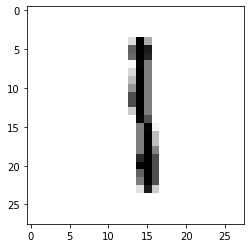

In [41]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 *
28).float()
Y_single_data = mnist_test.test_labels[r:r + 1]

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction,
1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28),
cmap="Greys", interpolation="nearest")
plt.show()

### 5. Backpropagation

In [42]:
training_data = np.loadtxt('data/mnist_train.csv', delimiter = ',', dtype = np.float32)
test_data = np.loadtxt('data/mnist_test.csv', delimiter = ',', dtype = np.float32)

print("training_data.shape = ", training_data.shape, "test_data.shape = ", test_data.shape)

training_data.shape =  (60000, 785) test_data.shape =  (10000, 785)


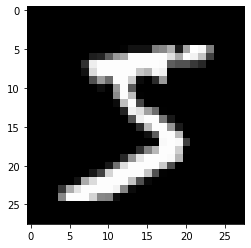

In [43]:
import matplotlib.pyplot as plt

img = training_data[0][1:].reshape(28, 28)

plt.imshow(img, cmap = 'gray')
plt.show()

In [44]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [45]:
class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)
        
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)
        
        self.Z3 = np.zeros([1, output_nodes])
        self.A3 = np.zeros([1, output_nodes])
        
        self.Z2 = np.zeros([1, hidden_nodes])
        self.A2 = np.zeros([1, hidden_nodes])
        
        self.Z1 = np.zeros([1, input_nodes])
        self.A1 = np.zeros([1, input_nodes])
        
        self.learning_rate = learning_rate
        
    def feed_forward(self):
        
        delta = 1e-7
        
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return np.sum((self.target_data - self.A3) **2) / len(self.target_data)
    
    def loss_val(self):
        
        delta = 1e-7
        
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return np.sum((self.target_data - self.A3) **2) / len(self.target_data)
    
    def train(self, input_data, target_data):
        
        self.target_data = target_data
        self.input_data = input_data
        
        loss_val = self.feed_forward()
        
        loss_3 = (self.A3 - self.target_data) * self.A3 * (1-self.A3)
        
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)
        self.b3 = self.b3 - self.learning_rate * loss_3
        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
    def predict(self, input_data):
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
        
        return predicted_num
    
    def accuracy(self, test_data):
        
        matched_list = []
        not_matched_list = []
        
        for index in range(len(test_data)):
            
            label = int(test_data[index, 0])
            
            data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01
            
            predicted_num = self.predict(np.array(data, ndmin = 2))
            
            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        print("Current Accuracy = ", 100 * (len(matched_list) / (len(test_data))), " %")

In [46]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
epochs = 1

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

start_time = datetime.now()

for i in range(epochs):
    
    for step in range(len(training_data)):
        
        target_data = np.zeros(output_nodes) + 0.01
        target_data[int(training_data[step, 0])] = 0.99
        
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
        
        nn.train(np.array(input_data, ndmin = 2), np.array(target_data, ndmin = 2))
        
        if step % 400 ==0:
            print("step =", step, ", loss_val =", nn.loss_val())
            
end_time = datetime.now()
print("time =", end_time - start_time)

step = 0 , loss_val = 0.9741581219339397
step = 400 , loss_val = 0.2812444375799008
step = 800 , loss_val = 0.41214650440764966
step = 1200 , loss_val = 0.015287382013827226
step = 1600 , loss_val = 0.14188155264902352
step = 2000 , loss_val = 0.40121319279523954
step = 2400 , loss_val = 0.00592518547179214
step = 2800 , loss_val = 0.05423056739973844
step = 3200 , loss_val = 0.007043585090767172
step = 3600 , loss_val = 0.0029286307626587493
step = 4000 , loss_val = 0.011835284670484832
step = 4400 , loss_val = 0.002842623054611834
step = 4800 , loss_val = 0.010838155685282206
step = 5200 , loss_val = 0.0035348504396041022
step = 5600 , loss_val = 0.007265244391543916
step = 6000 , loss_val = 0.0008185305615606513
step = 6400 , loss_val = 0.005533215991679035
step = 6800 , loss_val = 0.000980999387133718
step = 7200 , loss_val = 0.002132196611703218
step = 7600 , loss_val = 0.004246857948752866
step = 8000 , loss_val = 0.0008771597409816644
step = 8400 , loss_val = 0.00281486343131529

In [47]:
nn.accuracy(test_data)

Current Accuracy =  94.01  %
